# Explore Zillow Exercises

## 
Ask and answer at least 5 questions about the data, keeping in mind that your target variable is logerror.

(e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?)

## Imports and Prep

### Imports

In [2]:
import pandas as pd
import wrangle_zillow as w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Fix so our 'check_columns' will display correctly
pd.options.display.max_rows = 70

# Change float formatting to avoid unreadable scientific notation
pd.options.display.float_format = "{:20,.2f}".format

### Get data

In [3]:
# Get our Zillow data
df = w.get_zillow()

Total rows: 71789
Total columns: 69


### Univariate Exploration (before split)

Total rows: 71789
Total columns: 69


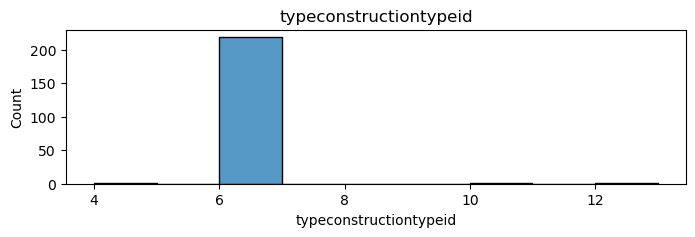

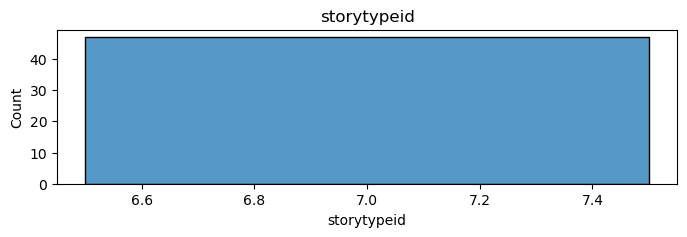

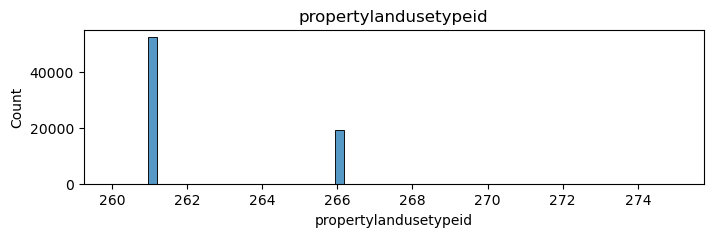

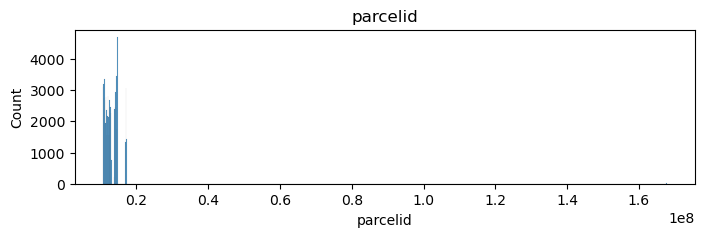

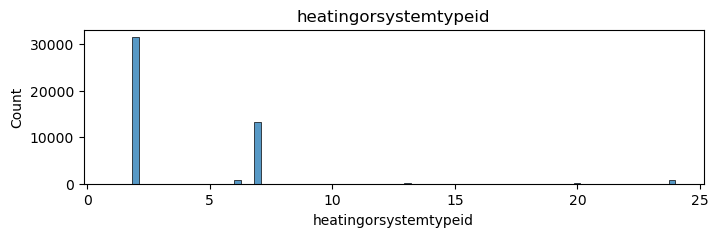

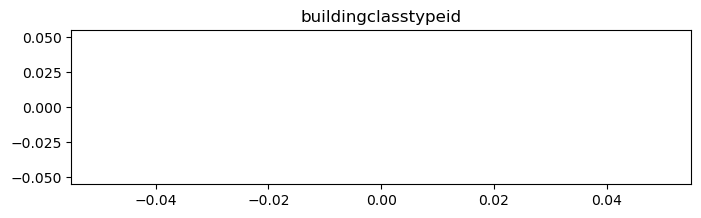

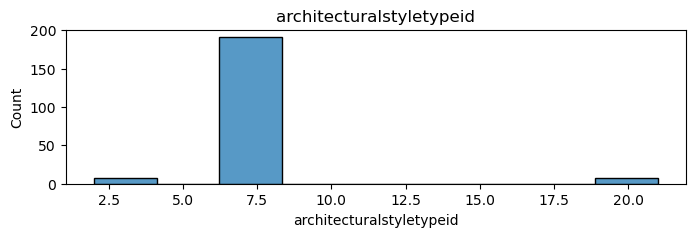

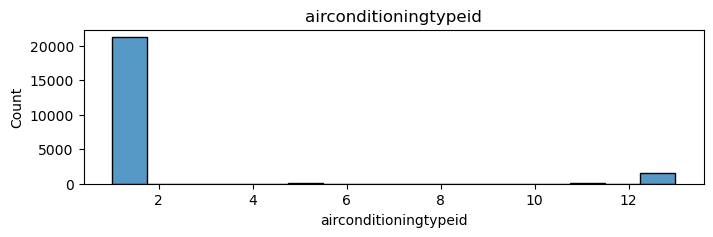

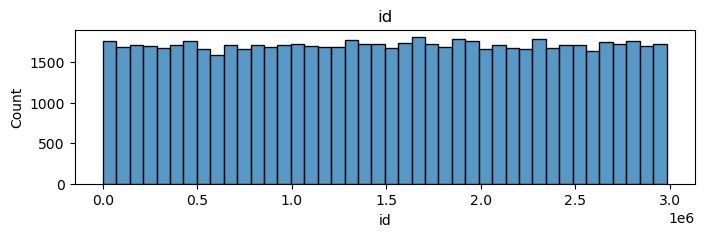

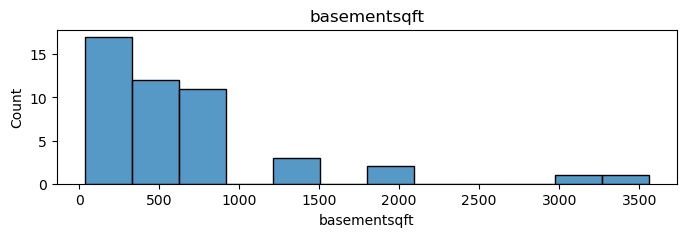

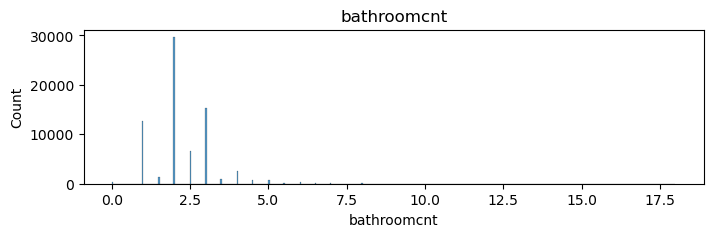

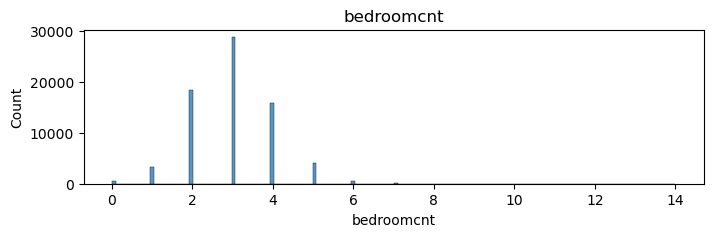

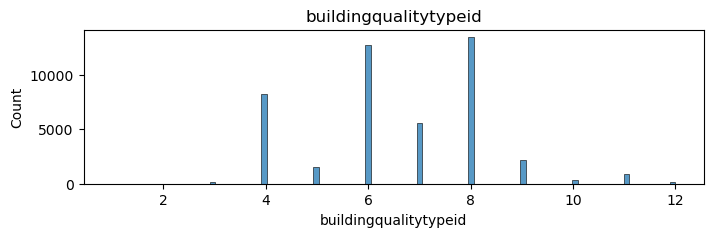

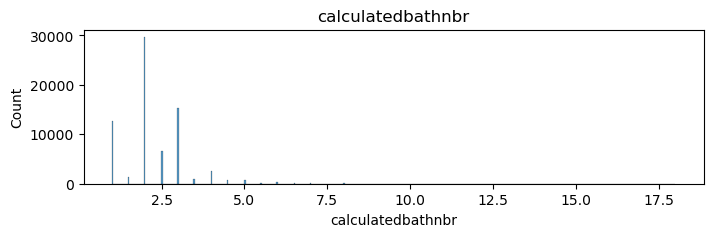

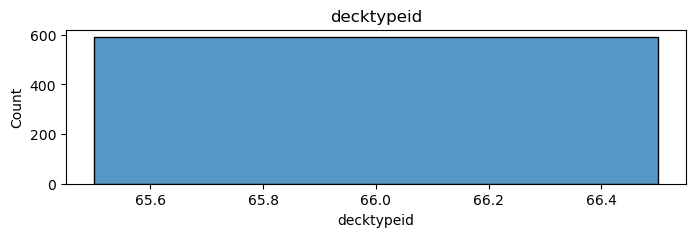

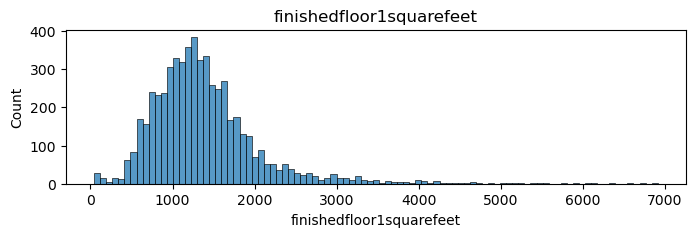

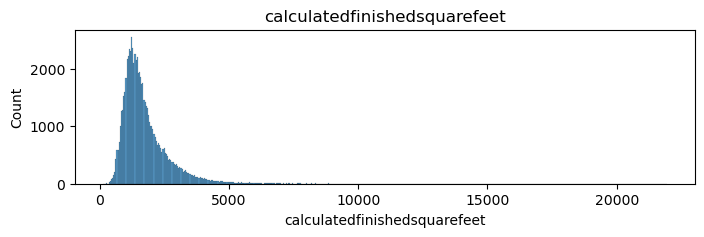

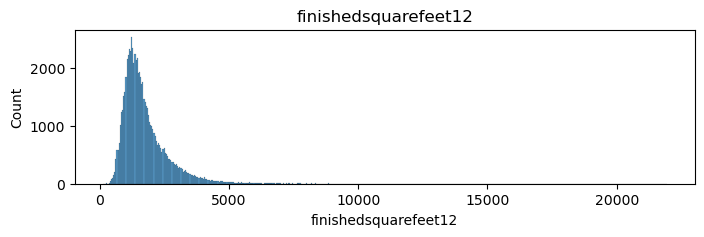

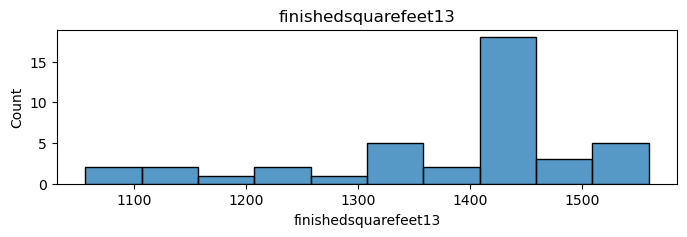

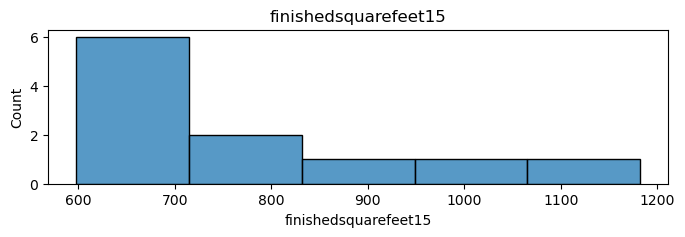

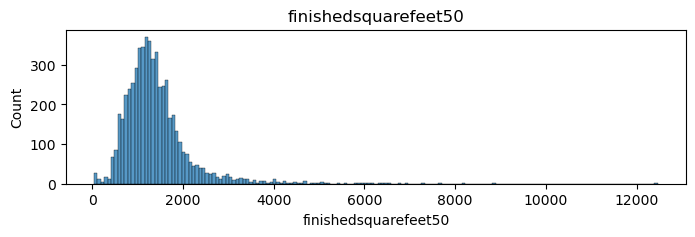

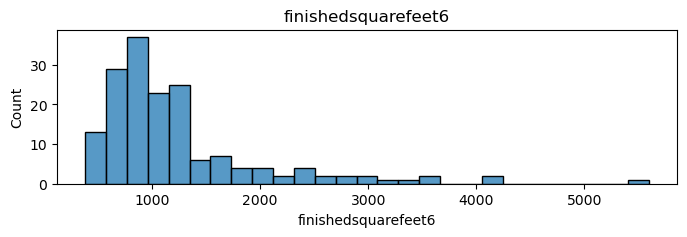

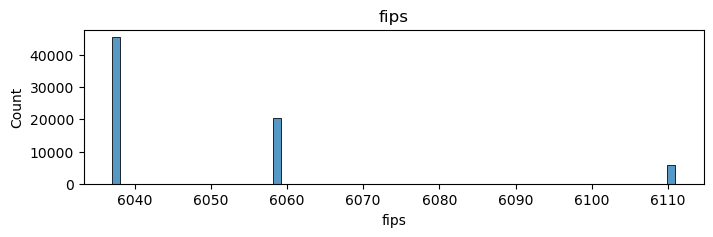

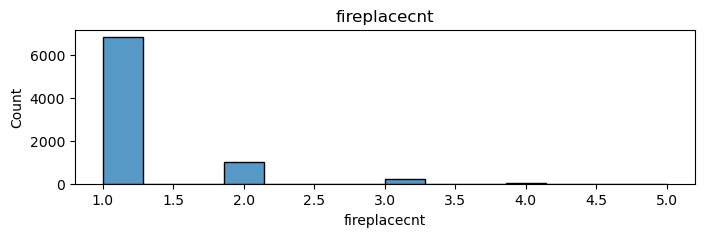

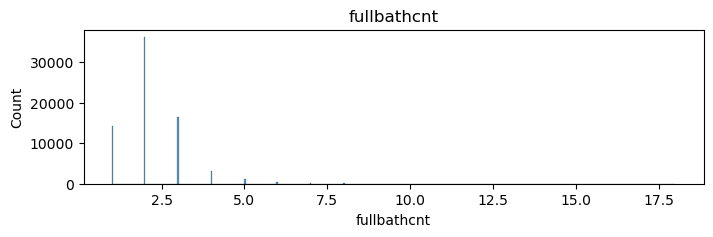

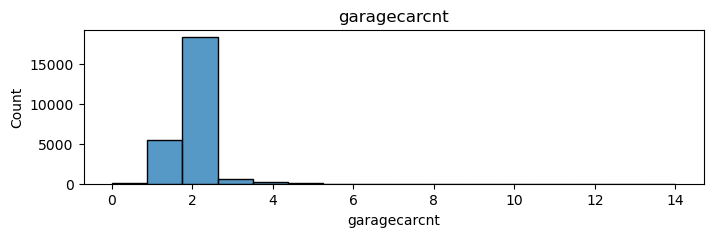

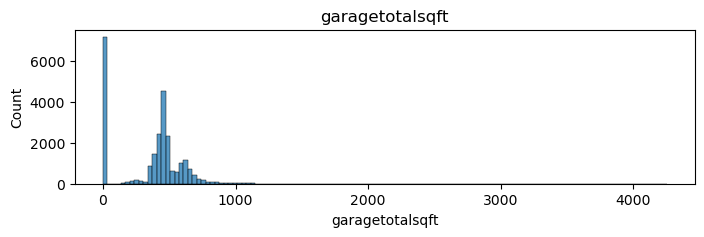

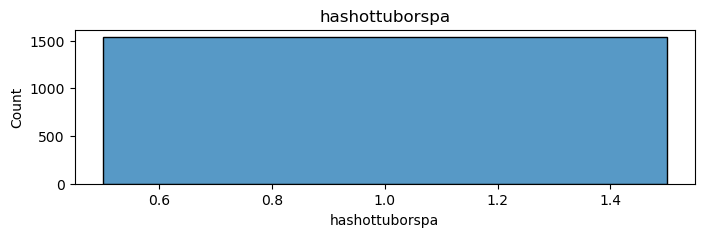

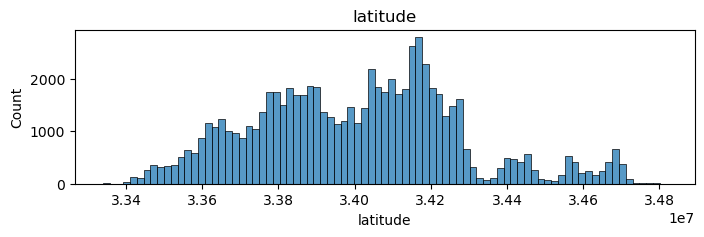

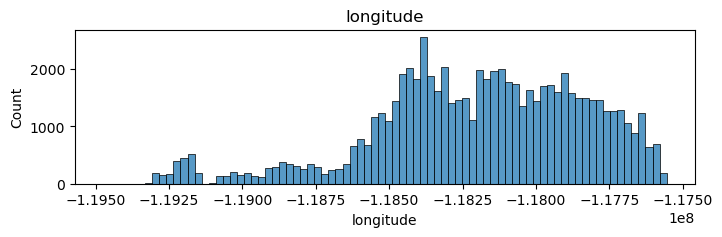

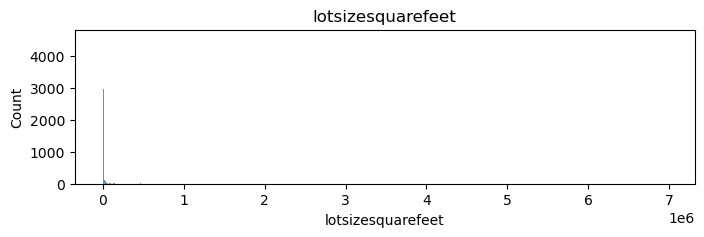

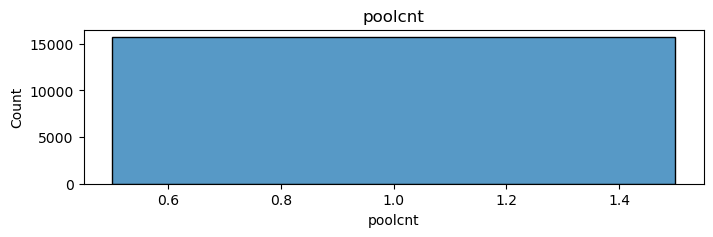

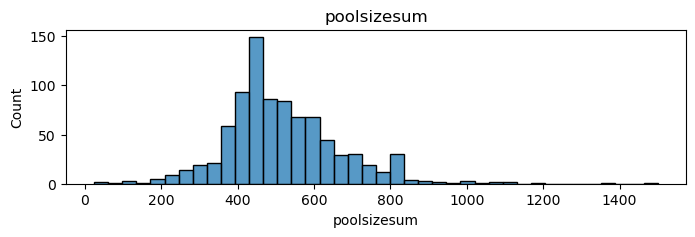

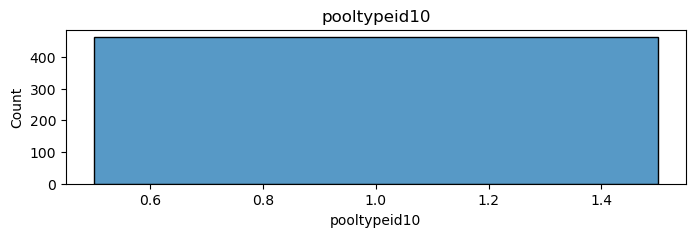

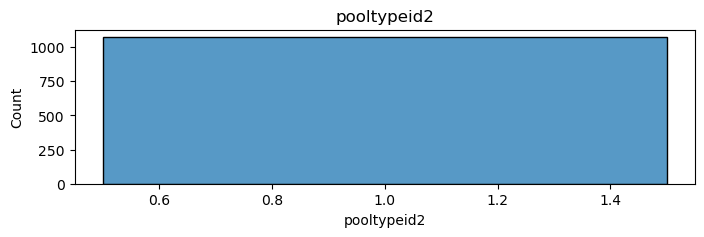

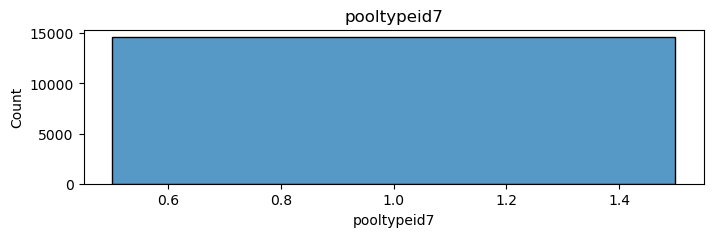

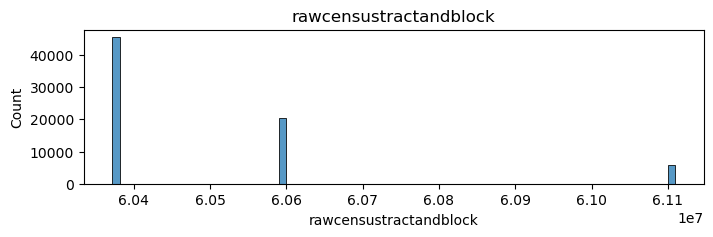

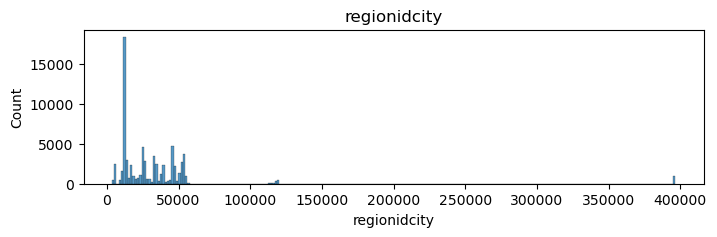

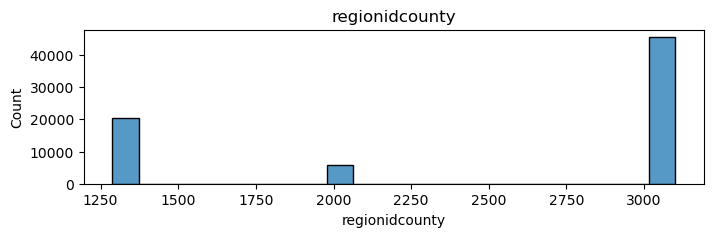

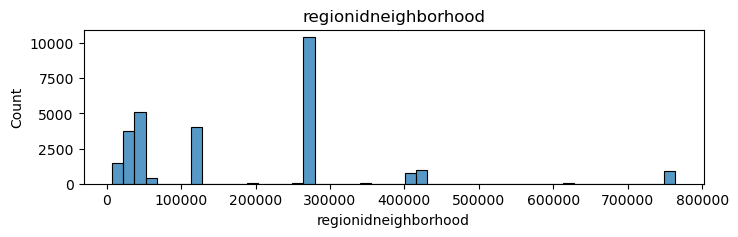

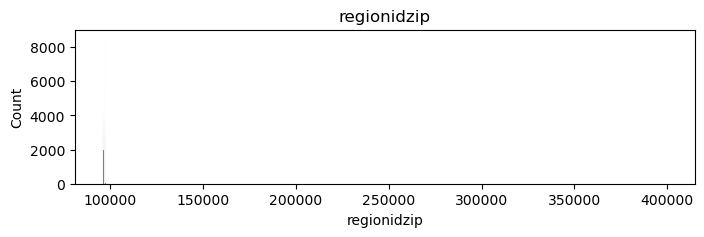

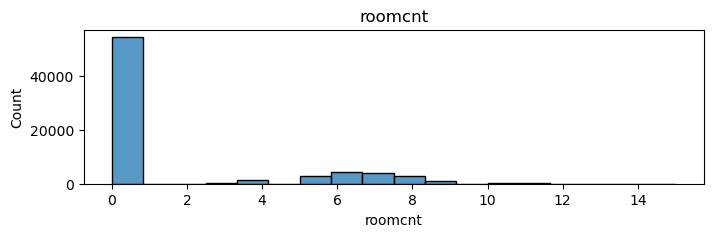

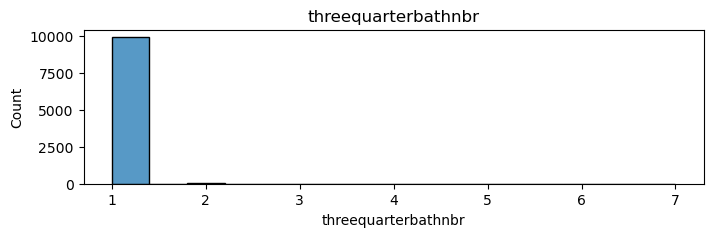

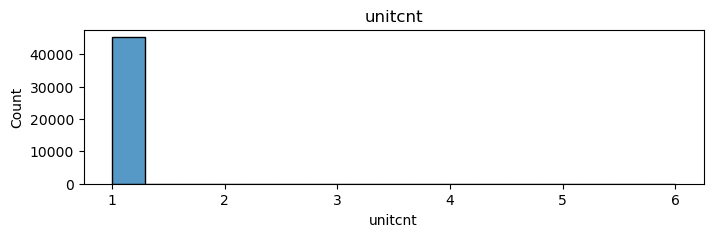

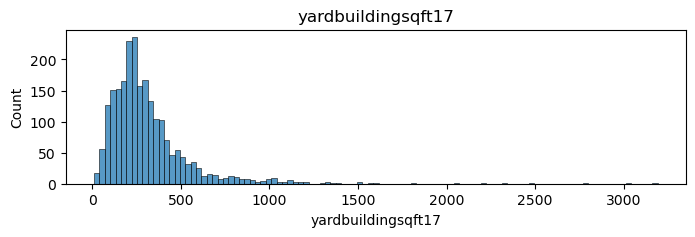

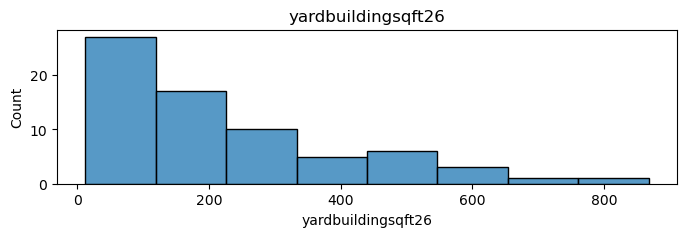

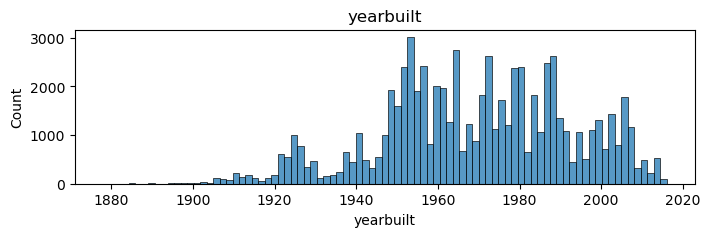

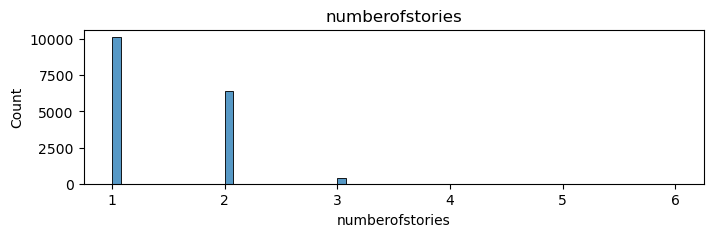

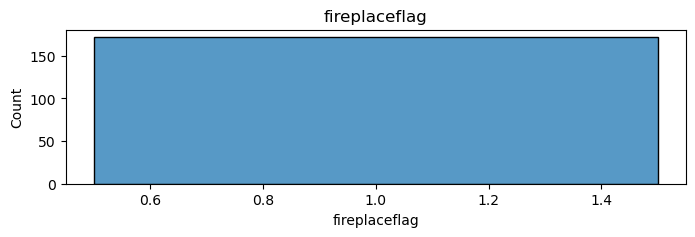

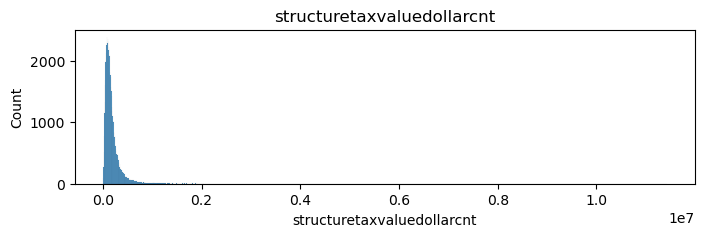

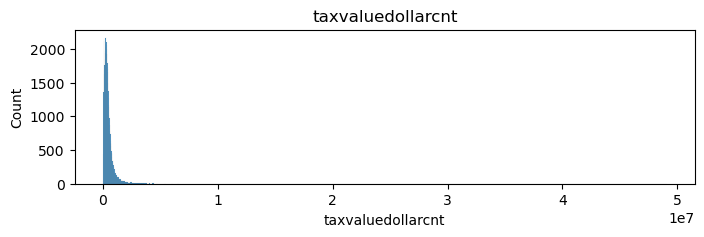

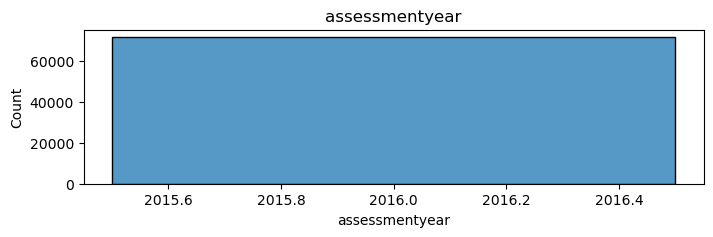

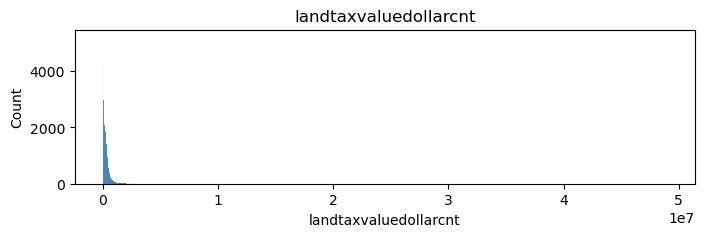

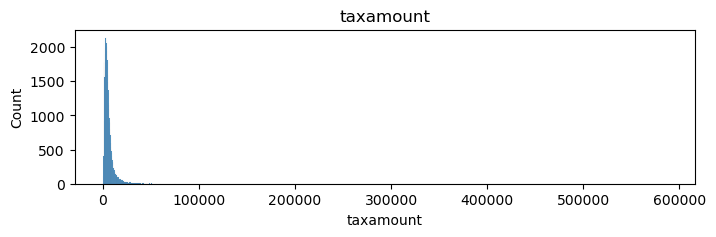

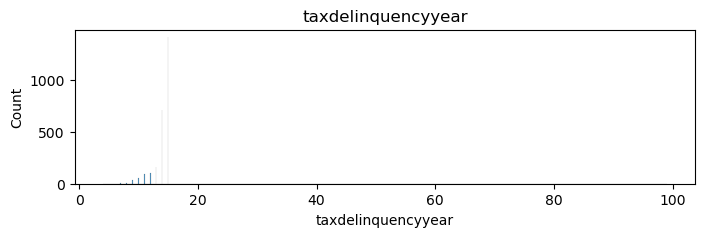

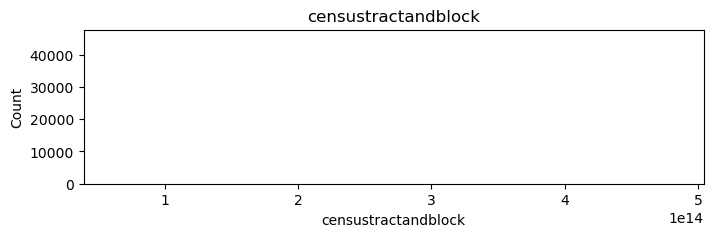

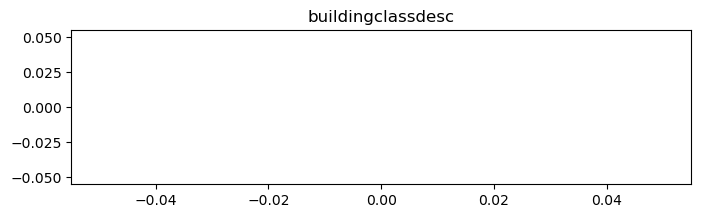

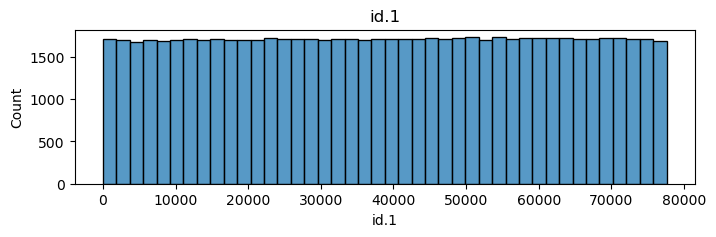

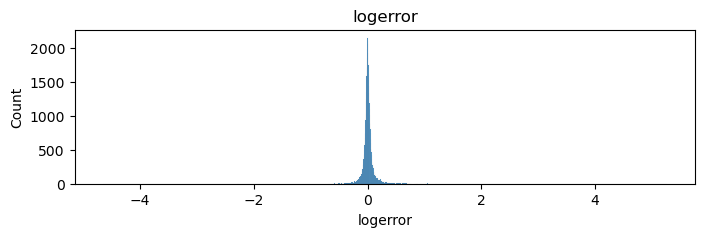

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,typeconstructiontypeid,float64,4,71567,1.00,"[nan, 6.0, 13.0, 10.0, 4.0]","[4.0, 13.0, 6.04054054054054]"
1,storytypeid,float64,1,71742,1.00,"[nan, 7.0]","[7.0, 7.0, 7.0]"
2,propertylandusetypeid,float64,6,0,0.00,"[261.0, 266.0, 260.0, 275.0, 263.0, 264.0]","[260.0, 275.0, 262.35690704704064]"
3,parcelid,int64,71789,0,0.00,"[14297519, 17052889, 14186244, 12177905, 10887...","[10711855.0, 167688532.0, 13044089.102327654]"
4,heatingorsystemtypeid,float64,10,25218,0.35,"[nan, 2.0, 7.0, 6.0, 24.0, 13.0, 18.0, 20.0, 1...","[1.0, 24.0, 3.9508062957634578]"
5,buildingclasstypeid,float64,0,71789,1.00,[nan],"[nan, nan, nan]"
6,architecturalstyletypeid,float64,5,71583,1.00,"[nan, 7.0, 8.0, 21.0, 3.0, 2.0]","[2.0, 21.0, 7.388349514563107]"
7,airconditioningtypeid,float64,4,48762,0.68,"[nan, 1.0, 13.0, 5.0, 11.0]","[1.0, 13.0, 1.8686324749207452]"
8,id,int64,71789,0,0.00,"[1727539, 1387261, 11677, 2288172, 1970746, 14...","[349.0, 2982274.0, 1495246.7838387496]"
9,basementsqft,float64,41,71742,1.00,"[nan, 900.0, 1416.0, 224.0, 100.0, 512.0, 380....","[38.0, 3560.0, 678.9787234042553]"


In [4]:
w.check_columns(df, graphs=True)

### Split for Multivariate

In [5]:
train, val, test = w.split_data(df)

train: 43073 (60% of 71789)
validate: 14358 (20% of 71789)
test: 14358 (20% of 71789)


### Functions for exercise

In [6]:
def kruskal(s1, s2, s3):
    """A function take takes in 3 variables, and performs the kruskal
    wallis stats testing on the 3."""
    stat, p = stats.kruskal(s1, s2, s3)
    print("Kruskal-Wallis H-Test:\n", f"stat = {stat}, p = {p}")

def plot_correlations(df, cols=None):
    """
    This function creates a bar plot of the correlations between each column in the given dataframe.

    :param df: The dataframe to use for plotting
    :return: None
    """
    if cols == None:
        # Get a list of all columns in the dataframe
        cols = df.columns.to_list()

    # Loop through each column and create a bar plot of its correlations with all other columns
    for col in cols:
        # Calculate the correlations between the current column and all other columns
        corr = df[cols].corr()[col]
        # Sort the correlations in descending order and create a bar plot
        corr.sort_values(ascending=False).plot(kind="bar")
        # Set the title of the plot to the current column name
        plt.title(col)
        # Show the plot
        plt.show()

def spearman(train, x, y, alt_hyp="two-sided"):
    """
    Calculate the Spearman's rank correlation coefficient and p-value between two variables,
    and plot a regression line using Seaborn.

    Parameters:
    train (pandas.DataFrame): The training dataset.
    x (str): The name of the first variable.
    y (str): The name of the second variable.
    alt_hyp (str, optional): The alternative hypothesis for the test. Default is "two-sided".

    Returns:
    None
    """

    # Calculate the Spearman's rank correlation coefficient and p-value
    r, p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)

    # Print the results
    print(f"Spearman's R: {x} and {y}\n", f"R = {r}, P = {p}\n")

    # Plot a regression line using Seaborn
    sns.regplot(data=train, x=x, y=y, marker=".", line_kws={"color": "orange"})

    # Show the plot
    plt.show()

def plot_lmplot(df, target):
    """
    Plot linear regression between each feature and target variable.

    Args:
        df (pandas.DataFrame): dataframe containing features and target variable
        target (str): name of target variable

    Returns:
        None
    """
    for i in df.drop(columns=target):
        sns.lmplot(x=i, y=target, data=df, line_kws={"color": "orange"})
        plt.show()

## Questions

### Column Stats

In [7]:
w.check_columns(train)

Total rows: 43073
Total columns: 69


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,typeconstructiontypeid,float64,4,42941,1.00,"[nan, 6.0, 13.0, 10.0, 4.0]","[4.0, 13.0, 6.068181818181818]"
1,storytypeid,float64,1,43046,1.00,"[nan, 7.0]","[7.0, 7.0, 7.0]"
2,propertylandusetypeid,float64,6,0,0.00,"[261.0, 266.0, 263.0, 275.0, 264.0, 260.0]","[260.0, 275.0, 262.36565830102387]"
3,parcelid,int64,43073,0,0.00,"[13083122, 10833050, 13061936, 12774321, 12512...","[10711877.0, 167688532.0, 13045873.277110951]"
4,heatingorsystemtypeid,float64,9,15228,0.35,"[2.0, 7.0, nan, 6.0, 24.0, 13.0, 20.0, 18.0, 1...","[1.0, 24.0, 3.949182977195188]"
5,buildingclasstypeid,float64,0,43073,1.00,[nan],"[nan, nan, nan]"
6,architecturalstyletypeid,float64,5,42955,1.00,"[nan, 7.0, 8.0, 21.0, 3.0, 2.0]","[2.0, 21.0, 7.6440677966101696]"
7,airconditioningtypeid,float64,4,29283,0.68,"[nan, 1.0, 11.0, 13.0, 5.0]","[1.0, 13.0, 1.887454677302393]"
8,id,int64,43073,0,0.00,"[338261, 2447326, 84607, 1500306, 2230050, 120...","[349.0, 2982274.0, 1494813.1804842942]"
9,basementsqft,float64,26,43046,1.00,"[nan, 1218.0, 384.0, 200.0, 786.0, 273.0, 3112...","[38.0, 3560.0, 734.6296296296297]"


### Question 1
Is logerror correlated with value (taxvaluedollarcnt)?

Spearman's R: taxvaluedollarcnt and logerror
 R = 0.020423257593910518, P = 2.245484035879521e-05



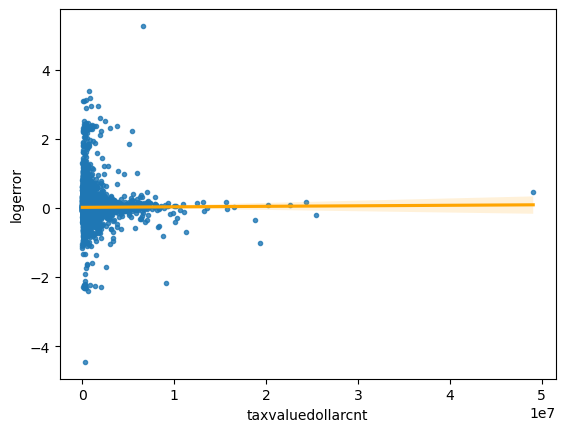

<Figure size 1400x1400 with 0 Axes>

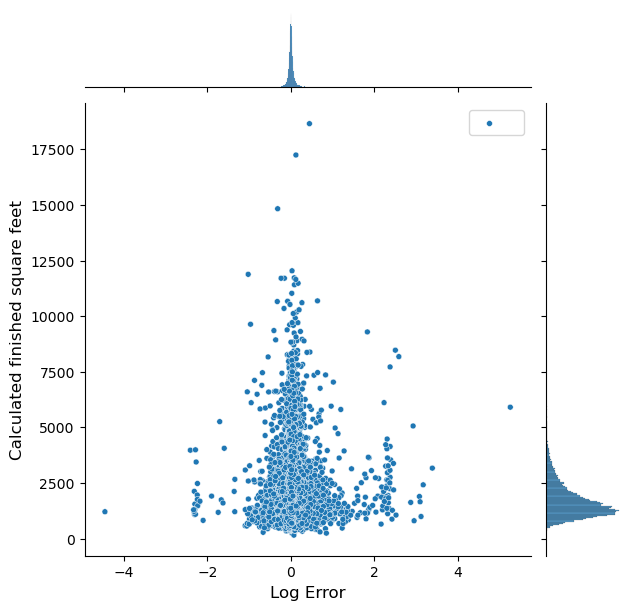

In [26]:
spearman(train, "taxvaluedollarcnt", "logerror")


# Set figure size
plt.figure(figsize=(14,14))
# Make the plot
sns.jointplot(x=train.logerror.values, y=train.calculatedfinishedsquarefeet.values, size=10)
# Label the Y
plt.ylabel('Calculated finished square feet', fontsize=12)
# Label the X
plt.xlabel('Log Error', fontsize=12)

# Remove the legend from the plot
plt.legend(' ')

# Show the plot
plt.show()

<u> There is a correlation

### Question 2

* $H_0$: There is **NO** significant difference in `logerror_binned` and `county`

* $H_a$: There is a significant difference between `logerror_binned` and `county`

* Categorical (`logerror_binned`) vs Categorical (`county`) = $Chi^2$

When compared vs LA, there is significant difference. When compared Orange vs Ventura, there is not a significant difference.

In [69]:
# Make a new column for logerror as a whole number
train["logerror_binned"] = train.logerror.round(0)

# Make it an int
train["logerror_binned"] = train.logerror_int.astype(int)

In [75]:
train['logerror_binned'].value_counts()

logerror_binned
 0    42448
 1      370
-1      145
 2       74
-2       23
 3       11
-4        1
 5        1
Name: count, dtype: int64

In [70]:
# Create a new column with the fips mapped to the county named
train["county"] = train.fips.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})

In [71]:
# Do a chi2 contingency comparing each county to each other
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train['county'], train['logerror_binned']))

# Make a print for the chi2 results
print(f"chi^2 = {chi2:.4f}")
print(f"p     = {p:.4f}")

chi^2 = 64.6423
p     = 0.0000


In [72]:
# Chi2 for LA vs Ventura
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train[train.county != "Orange"]['county'], train[train.county != "Orange"]['logerror_binned']))

# Make a print for the chi2 results
print(f"chi^2 = {chi2:.4f}")
print(f"p     = {p:.4f}")

chi^2 = 31.7593
p     = 0.0000


In [73]:
# Chi2 for LA vs Orange
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train[train.county != "Ventura"]['county'], train[train.county != "Ventura"]['logerror_binned']))

print(f"chi^2 = {chi2:.4f}")
print(f"p     = {p:.4f}")

chi^2 = 46.9739
p     = 0.0000


In [74]:
# Chi2 for Orange vs Ventura
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(train[train.county != "LA"]['county'], train[train.county != "LA"]['logerror_binned']))

print(f"chi^2 = {chi2:.4f}")
print(f"p     = {p:.4f}")

chi^2 = 8.9973
p     = 0.1092


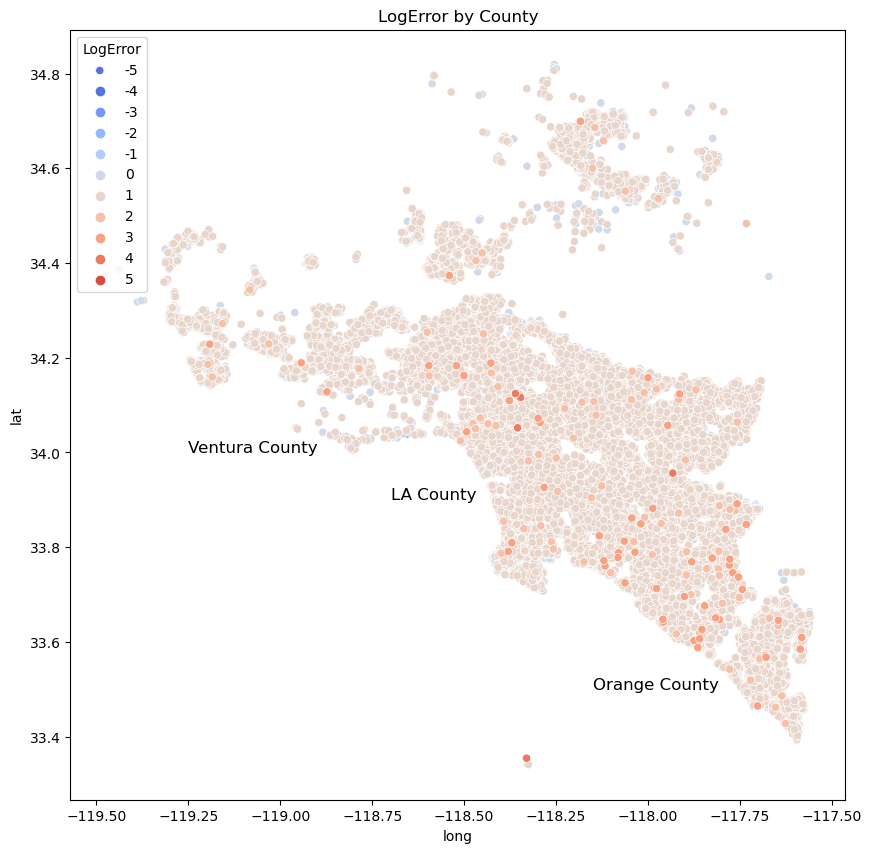

In [55]:
# Function for plotting

def plot_logerror_by_county(df):
    """
    Create a scatter plot of the logerror by county.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """

    # Filter the data by county
    la_county = df[df.fips == "06037"]
    orange_county = df[df.fips == "06059"]
    ventura_county = df[df.fips == "06111"]

    # Set the size of the plot
    plt.figure(figsize=[10, 10])

    # Create a copy of the data and convert from microdegrees to degrees
    z = df.copy()
    z = z.assign(lat=z.latitude / 1_000_000)
    z = z.assign(long=z.longitude / 1_000_000)

    # Create a scatter plot for each county, with hue on logerror
    sns.scatterplot(
        data=z.sort_values("logerror_binned"), y="lat", x="long", hue="logerror_binned", palette="coolwarm"
    )

    # Add county labels to the plot
    plt.text(y=34, x=-119.25, s="Ventura County", fontsize=12)
    plt.text(y=33.9, x=-118.7, s="LA County", fontsize=12)
    plt.text(y=33.5, x=-118.15, s="Orange County", fontsize=12)

    # Add a title to the plot
    plt.title("LogError by County")

    # Make a legend for all values (-5 to 5)
    plt.legend(
        title="LogError",
        loc="upper left",
        labels=[
            "-5",
            "-4",
            "-3",
            "-2",
            "-1",
            "0",
            "1",
            "2",
            "3",
            "4",
            "5",
        ],
    )
    
    # Show the plot
    plt.show()
    
plot_logerror_by_county(train)

In [43]:
train['logerror_binned'].value_counts()

logerror_binned
(0, 1]      24270
(-1, 0]     18616
(1, 2]         85
(2, 3]         57
(-2, -1]       21
(-3, -2]       17
(3, 4]          5
(-5, -4]        1
(-4, -3]        0
(4, 5]          0
Name: count, dtype: int64

In [50]:
# Make a separate dataframe where logerror_binned is a string
train_str = train.copy()
train_str["logerror_binned"] = train_str.logerror_binned.astype(str)

In [51]:
# Make a column for neg logerrors
train["negative_logerror"] = train_str.logerror_binned.isin(["(-5, -4]", "(-4, -3]", "(-3, -2]", "(-2, -1]"])

In [52]:
# Make a column for positive_logerror
train["positive_logerror"] = train_str.logerror_binned.isin(["(0, 1]", "(1, 2]", "(2, 3]", "(3, 4]", "(4, 5]"])

In [53]:
train['positive_logerror'].value_counts()

positive_logerror
True     24417
False    18656
Name: count, dtype: int64

In [54]:
train['negative_logerror'].value_counts()

negative_logerror
False    43034
True        39
Name: count, dtype: int64

<u>Logerror is different by county

### Question 3
Is logerror and sqfeet correlated?

In [32]:
# Are log error and sqfeet correlated

# Calculate the Spearman's rank correlation coefficient and p-value
r, p = stats.spearmanr(train.calculatedfinishedsquarefeet, train.logerror, alternative="two-sided")

# Print the results
print(f"Spearman's R: calculatedfinishedsquarefeet and logerror\n", f"R = {r}, P = {p}\n")

Spearman's R: calculatedfinishedsquarefeet and logerror
 R = nan, P = nan



### Question 4
Is logerror significantly different based on airconditioningdesc?

In [10]:
train['airconditioningdesc'].fillna('No AC', inplace=True)

In [11]:
train['airconditioningdesc'].value_counts(dropna=False)

airconditioningdesc
No AC        29381
Central      12700
Yes            963
Wall Unit       29
Name: count, dtype: int64

Kruskal-Wallis H-Test:
 stat = 5.555024233517389, p = 0.13538435020321318


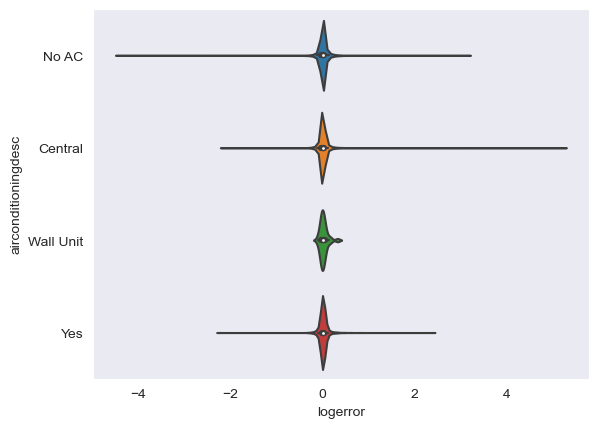

In [12]:
stat,p = stats.kruskal(train[train.airconditioningdesc=='No AC']['logerror'],train[train.airconditioningdesc=='Central']['logerror'],train[train.airconditioningdesc=='Yes']['logerror'],train[train.airconditioningdesc=='Wall Unit']['logerror'])
print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')
sns.violinplot(data=train,y='airconditioningdesc',x='logerror')
plt.show()

<u> Not Statistically Different

### Question 5
Are year and logerror correlated?

Spearman's R: yearbuilt and logerror
 R = nan, P = nan



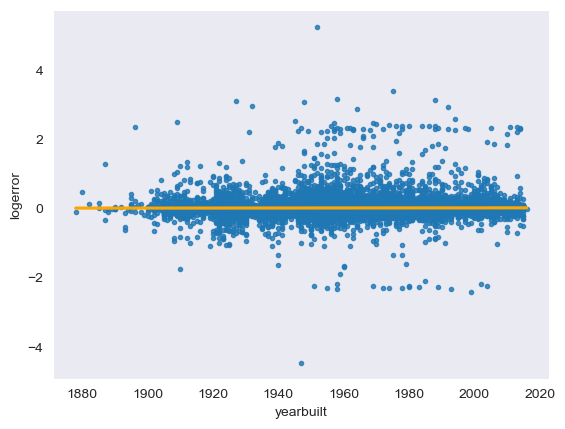

In [31]:
# Are year and logerror correlated?
spearman(train, "yearbuilt", "logerror")

#### (If I get time) Is logerror different by city or zip?

In [13]:
# # Drop null values from regionidcity
# train = train.dropna(subset=["regionidzip"])

In [16]:
# Change regionidzip to an int
# train.regionidzip = train.regionidzip.astype(int)

In [17]:
# # import calizips.csv
# calizips = pd.read_csv("calizips.csv")

In [18]:
# w.check_columns(calizips)

Total rows: 1721
Total columns: 9


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,OBJECTID,int64,1721,0,0.00,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1721.0, 861.0]"
1,ZIP_CODE,int64,1721,0,0.00,"[12, 16, 17, 18, 19, 20, 22, 26, 28, 29, 31, 3...","[12.0, 96162.0, 91862.25973271354]"
2,PO_NAME,object,1120,0,0.00,"[Mt Meadows Area, Sequoia National Forest, Nor...",None
3,STATE,object,1,0,0.00,[CA],None
4,POPULATION,int64,1615,0,0.00,"[-99, 59907, 53573, 71967, 63987, 41844, 61184...","[-99.0, 110888.0, 22999.155723416618]"
5,POP_SQMI,float64,1636,0,0.00,"[-99.0, 16970.82, 17281.61, 20503.42, 20508.65...","[-99.0, 57042.72, 3490.524846019756]"
6,SQMI,float64,1481,0,0.00,"[30.92, 39.33, 564.38, 90.83, 412.59, 397.92, ...","[0.05, 3582.68, 91.86607786170832]"
7,SHAPE_Length,float64,1721,0,0.00,"[195388.61917966, 169790.572348123, 873109.208...","[5286.44260937932, 2456287.58062252, 246592.47..."
8,SHAPE_Area,float64,1721,0,0.00,"[-862157443.221137, -1096295677.53613, -157341...","[-99879767200.1619, 3497929754.58622, -2556765..."


In [19]:
# # Drop all columns besides zip_code and po_name
# calizips = calizips[["ZIP_CODE", "PO_NAME"]]

In [28]:
# calizips

,ZIP_CODE,PO_NAME
0,12,Mt Meadows Area
1,16,Sequoia National Forest
2,17,Northeast Fresno County
3,18,Los Padres Ntl Forest
4,19,Lassen Ntl Forest
...,...,...
1716,96146,Olympic Valley
1717,96148,Tahoe Vista
1718,96150,South Lake Tahoe
1719,96161,Truckee


In [20]:
# # merge train and calizips, keeping all data from train, and dropping from calizips if ZIP_CODE is not in train.
# train2 = train.merge(calizips, left_on="regionidzip", right_on="ZIP_CODE", how="left")

In [22]:
# # Drop nulls from zip_code and po_name
# train2 = train2.dropna(subset=["ZIP_CODE", "PO_NAME"])

In [27]:
# train['regionidzip'].value_counts()

regionidzip
97319    499
96987    463
97318    438
96993    376
96974    370
        ... 
97108      3
96467      1
97088      1
97092      1
97111      1
Name: count, Length: 386, dtype: int64

In [23]:
# w.check_columns(train2)

Total rows: 5579
Total columns: 71


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,typeconstructiontypeid,float64,0,5579,1.00,[nan],"[nan, nan, nan]"
1,storytypeid,float64,1,5578,1.00,"[nan, 7.0]","[7.0, 7.0, 7.0]"
2,propertylandusetypeid,float64,3,0,0.00,"[261.0, 266.0, 260.0]","[260.0, 266.0, 262.474278544542]"
3,parcelid,int64,5579,0,0.00,"[11408749, 12330760, 11481645, 11486057, 11394...","[10861719.0, 17296474.0, 11906393.640437355]"
4,heatingorsystemtypeid,float64,3,169,0.03,"[7.0, 2.0, nan, 20.0]","[2.0, 20.0, 3.962846580406654]"
...,...,...,...,...,...,...,...
66,propertylandusedesc,object,3,0,0.00,"[Single Family Residential, Condominium, Resid...",None
67,storydesc,object,1,5578,1.00,"[nan, Basement]",None
68,typeconstructiondesc,object,0,5579,1.00,[nan],None
69,ZIP_CODE,float64,70,0,0.00,"[96137.0, 96101.0, 96107.0, 96124.0, 96024.0, ...","[95982.0, 96162.0, 96073.97902849973]"


In [ ]:
# # Plot the train latitude and longitude doing a different color for each regionidzip add a hue for logerror
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the size of the plot
# plt.figure(figsize=[12, 6])

# # Create a scatter plot of latitude and longitude, with a different color for each regionidzip and a hue for logerror
# sns.scatterplot(
#     data=train,
#     x="longitude",
#     y="latitude",
#     hue="logerror",
#     palette="coolwarm",
#     style="regionidzip",
#     alpha=0.7,
# )

# # Add a title to the plot
# plt.title("Train Latitude and Longitude by RegionIDZip and LogError")

# # Show the plot
# plt.show()

In [ ]:
# from scipy.stats import levene

# # Extract the logerror values for each county
# la_logerror = df[df.fips == 6037].logerror
# orange_logerror = df[df.fips == 6059].logerror
# ventura_logerror = df[df.fips == 6111].logerror

# # Perform the Levene test
# stat, p = levene(la_logerror, orange_logerror, ventura_logerror)







# # Print the results
# print(f"Levene test LogError by County\n", f"W = {stat}, P = {p}\n")

# kruskal(
#     train[train.fips == 6037].logerror,
#     train[train.fips == 6059].logerror,
#     train[train.fips == 6111].logerror,
# )

In [41]:
# def plot_logerror_by_county(df):
#     """
#     Create a scatter plot of the logerror by county.

#     Parameters:
#     df (pandas.DataFrame): The DataFrame containing the data.

#     Returns:
#     None
#     """

#     # Filter the data by county and add lat/long columns
#     la_county = df[df.fips == "06037"].assign(lat=df[df.fips == "06037"].latitude / 1_000_000, long=df[df.fips == "06037"].longitude / 1_000_000)
#     orange_county = df[df.fips == "06059"].assign(lat=df[df.fips == "06059"].latitude / 1_000_000, long=df[df.fips == "06059"].longitude / 1_000_000)
#     ventura_county = df[df.fips == "06111"].assign(lat=df[df.fips == "06111"].latitude / 1_000_000, long=df[df.fips == "06111"].longitude / 1_000_000)

#     # Set the size of the plot
#     plt.figure(figsize=[10, 10])

#     # Create a scatter plot for LA County, with hue on logerror
#     sns.scatterplot(
#         data=la_county.sort_values("logerror"), y="lat", x="long", hue="logerror", palette="coolwarm"
#     )

#     # Add a title to the plot
#     plt.title("LogError by LA County")

#     # Show the plot
#     plt.show()

#     # Set the size of the plot
#     plt.figure(figsize=[10, 10])

#     # Create a scatter plot for Orange County, with hue on logerror
#     sns.scatterplot(
#         data=orange_county.sort_values("logerror"), y="lat", x="long", hue="logerror", palette="coolwarm"
#     )

#     # Add a title to the plot
#     plt.title("LogError by Orange County")

#     # Show the plot
#     plt.show()

#     # Set the size of the plot
#     plt.figure(figsize=[10, 10])

#     # Create a scatter plot for Ventura County, with hue on logerror
#     sns.scatterplot(
#         data=ventura_county.sort_values("logerror"), y="lat", x="long", hue="logerror", palette="coolwarm"
#     )

#     # Add a title to the plot
#     plt.title("LogError by Ventura County")

#     # Show the plot
#     plt.show()

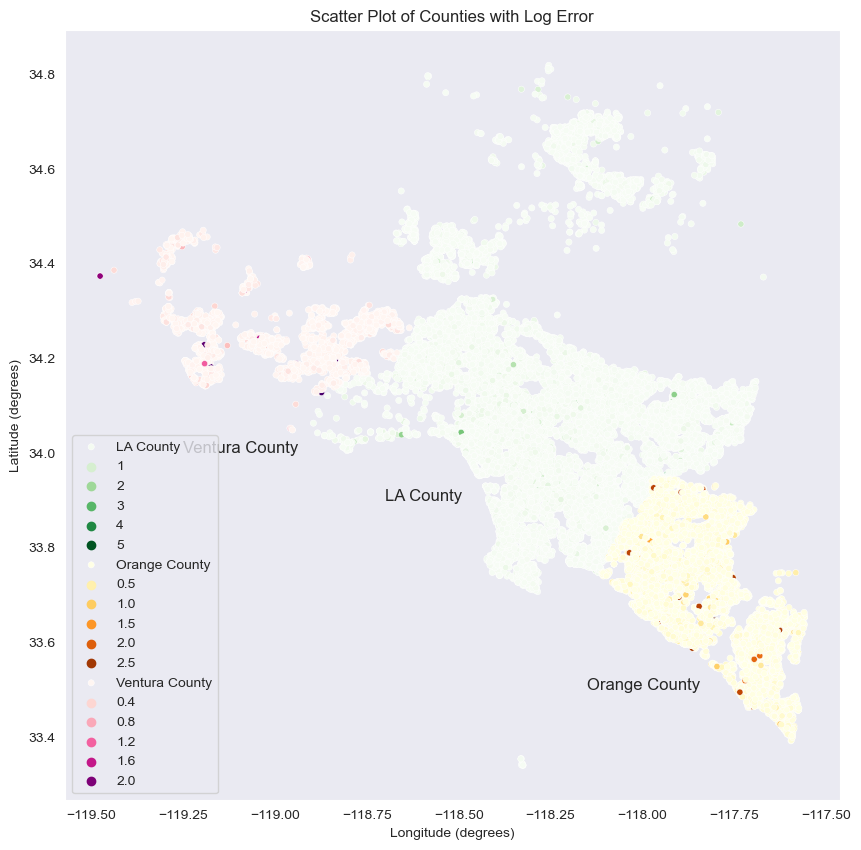

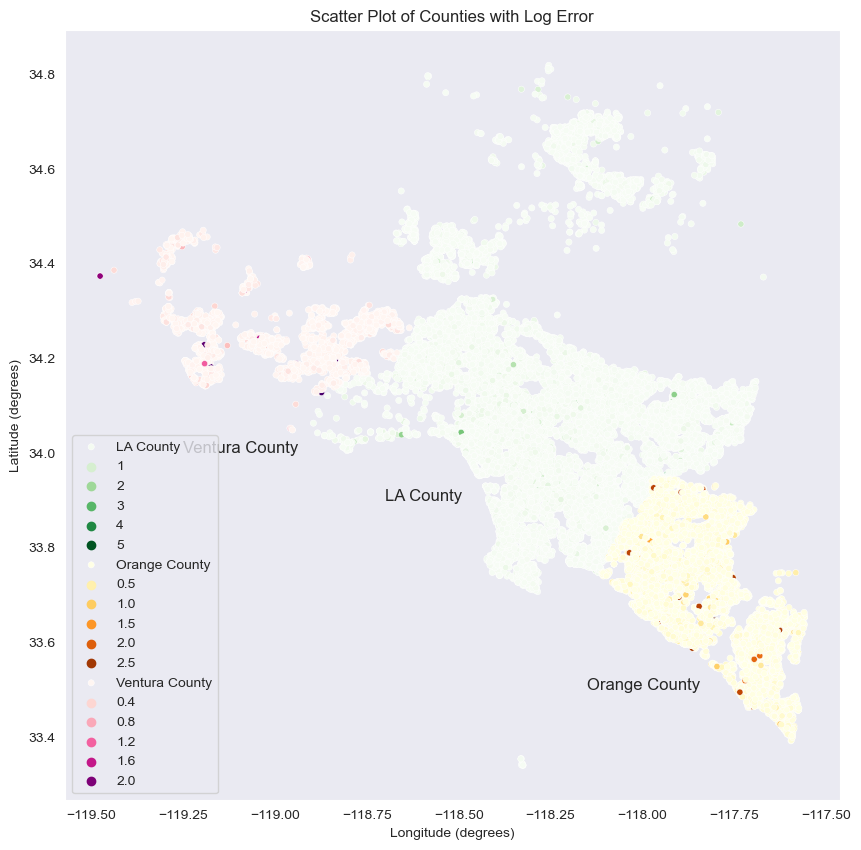

In [55]:
# def plot_counties_with_logerror(df):
#     # Make log error an absolute number
#     df['logerror'] = df['logerror'].abs()
#     # Filter data for each county
#     la_county = df[df['county'] == 'LA']
#     orange_county = df[df['county'] == 'Orange']
#     ventura_county = df[df['county'] == 'Ventura']

#     # Create a scatter plot for each county with different colors
#     plt.figure(figsize=(10, 10))
#     sns.scatterplot(data=la_county.sort_values("logerror", ascending=False), x=la_county['longitude'] / 1000000, y=la_county['latitude'] / 1000000, hue=la_county['logerror'], label='LA County', palette='Greens', s=20)
#     sns.scatterplot(data=orange_county.sort_values("logerror", ascending=False), x=orange_county['longitude'] / 1000000, y=orange_county['latitude'] / 1000000, hue=orange_county['logerror'], label='Orange County', palette='YlOrBr', s=20)
#     sns.scatterplot(data=ventura_county.sort_values("logerror", ascending=False), x=ventura_county['longitude'] / 1000000, y=ventura_county['latitude'] / 1000000, hue=ventura_county['logerror'], label='Ventura County', palette='RdPu', s=20)

#     # Set plot labels and legend
#     plt.title('Scatter Plot of Counties with Log Error')
#     plt.xlabel('Longitude (degrees)')
#     plt.ylabel('Latitude (degrees)')
#     plt.legend()
    
#     # Add county labels to the plot
#     plt.text(y=34, x=-119.25, s="Ventura County", fontsize=12)
#     plt.text(y=33.9, x=-118.7, s="LA County", fontsize=12)
#     plt.text(y=33.5, x=-118.15, s="Orange County", fontsize=12)

#     # Show the plot
#     plt.show()

# # Example usage:
# plot_counties_with_logerror(train)

# # Example usage:
# plot_counties_with_logerror(train)
